<a href="https://colab.research.google.com/github/Saoudyahya/RHLF/blob/main/RHLFv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Create a DataFrame with example prompts and feedback scores
data = {
    'prompt': [
        "What is the capital of France?",
        "Explain the theory of relativity in simple terms.",
        "Write a poem about the sea.",
        "Describe the process of photosynthesis.",
        "How does blockchain technology work?",
        "Give a summary of Shakespeare's 'Hamlet'.",
        "What are the health benefits of meditation?",
        "List the main causes of climate change.",
        "Describe the main characters in 'Pride and Prejudice'.",
        "Explain quantum computing in layman's terms."
    ],
    'feedback': [0.9, 0.8, 0.7, 0.95, 0.85, 0.88, 0.92, 0.8, 0.9, 0.75]
}

df = pd.DataFrame(data)

# Save to CSV
df.to_csv('human_feedback_dataset.csv', index=False)

print("Dataset created: human_feedback_dataset.csv")


Dataset created: human_feedback_dataset.csv


In [ ]:
pip install  datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.1 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from datasets import load_dataset

# Load your dataset
dataset = pd.read_csv('human_feedback_dataset.csv')

# Initialize tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
reward_model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)

# Prepare the data
inputs = tokenizer(dataset['prompt'].tolist(), return_tensors='pt', padding=True, truncation=True)
labels = torch.tensor(dataset['feedback'].tolist()).unsqueeze(1)

# Train the reward model
optimizer = optim.Adam(reward_model.parameters(), lr=5e-5)
reward_model.train()

for epoch in range(3):  # Number of epochs
    optimizer.zero_grad()
    outputs = reward_model(**inputs).logits
    loss = nn.MSELoss()(outputs, labels.float())
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch + 1}: Loss = {loss.item()}')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1: Loss = 0.8306739926338196
Epoch 2: Loss = 0.46003109216690063
Epoch 3: Loss = 0.14102405309677124


In [ ]:
import random
from transformers import AutoModelForCausalLM

# Load a causal language model
lm_model = AutoModelForCausalLM.from_pretrained('gpt2')

def generate_response(prompt):
    # Tokenize the input
    input_ids = tokenizer(prompt, return_tensors='pt', padding=True, truncation=True)

    # Get the attention mask
    attention_mask = input_ids['attention_mask']

    # Generate response with specified padding token id
    outputs = lm_model.generate(
        input_ids['input_ids'],
        attention_mask=attention_mask,
        max_length=50,  # Adjust as needed
        pad_token_id=tokenizer.eos_token_id  # Set padding token id
    )

    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # Clean up the response to remove any unwanted tokens
    cleaned_response = ' '.join(token for token in response.split() if not token.startswith('[unused'))
    return cleaned_response


In [ ]:
import torch
import random

# Reinforcement learning loop
for episode in range(10):  # Number of episodes
    prompt = "What is the capital of France?"
    response = generate_response(prompt)

    # Simulate human feedback for demonstration purposes
    human_feedback = torch.tensor([random.uniform(0, 1)]).unsqueeze(0)

    print(f"Prompt: {prompt}, Response: {response}, Feedback: {human_feedback.item()}")


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: What is the capital of France?, Response: what is the capital of france? — cost france 示 ∗ victim everyone 金os 訁 confederate everyone 示, Feedback: 0.09039730578660965


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: What is the capital of France?, Response: what is the capital of france? — cost france 示 ∗ victim everyone 金os 訁 confederate everyone 示, Feedback: 0.0036446924787014723


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: What is the capital of France?, Response: what is the capital of france? — cost france 示 ∗ victim everyone 金os 訁 confederate everyone 示, Feedback: 0.5304175019264221


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: What is the capital of France?, Response: what is the capital of france? — cost france 示 ∗ victim everyone 金os 訁 confederate everyone 示, Feedback: 0.4326919913291931


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: What is the capital of France?, Response: what is the capital of france? — cost france 示 ∗ victim everyone 金os 訁 confederate everyone 示, Feedback: 0.41450008749961853


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: What is the capital of France?, Response: what is the capital of france? — cost france 示 ∗ victim everyone 金os 訁 confederate everyone 示, Feedback: 0.7789105176925659


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: What is the capital of France?, Response: what is the capital of france? — cost france 示 ∗ victim everyone 金os 訁 confederate everyone 示, Feedback: 0.881655216217041


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: What is the capital of France?, Response: what is the capital of france? — cost france 示 ∗ victim everyone 金os 訁 confederate everyone 示, Feedback: 0.6767144203186035


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prompt: What is the capital of France?, Response: what is the capital of france? — cost france 示 ∗ victim everyone 金os 訁 confederate everyone 示, Feedback: 0.44848188757896423
Prompt: What is the capital of France?, Response: what is the capital of france? — cost france 示 ∗ victim everyone 金os 訁 confederate everyone 示, Feedback: 0.9945372939109802


In [ ]:
import torch
import torch.nn as nn
import time
from torch.utils.data import DataLoader, Dataset

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example Dataset
class SimpleDataset(Dataset):
    def __init__(self, num_samples=1000, seq_length=50, vocab_size=30522):
        self.num_samples = num_samples
        self.seq_length = seq_length
        self.vocab_size = vocab_size
        self.data = [
            {
                'input_ids': torch.randint(0, vocab_size, (seq_length,)),
                'labels': torch.randint(0, vocab_size, (seq_length,))
            }
            for _ in range(num_samples)
        ]

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        return self.data[idx]

# DataLoader
def get_data_loader(batch_size=32):
    dataset = SimpleDataset()
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Transformer Model
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers):
        super(Transformer, self).__init__()
        self.embedding = nn.Embedding(src_vocab_size, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model, num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.fc_out = nn.Linear(d_model, tgt_vocab_size)

    def forward(self, src):
        embedded = self.embedding(src)  # (batch_size, seq_length, d_model)
        embedded = embedded.permute(1, 0, 2)  # (seq_length, batch_size, d_model)
        transformer_out = self.transformer_encoder(embedded)  # (seq_length, batch_size, d_model)
        output = self.fc_out(transformer_out)  # (seq_length, batch_size, tgt_vocab_size)
        return output.permute(1, 0, 2)  # (batch_size, seq_length, tgt_vocab_size)

# Switch Transformer Model
class SwitchTransformer(nn.Module):
    def __init__(self, num_experts, hidden_size, num_heads):
        super(SwitchTransformer, self).__init__()
        self.num_experts = num_experts
        self.embedding = nn.Embedding(30522, hidden_size)
        self.expert_layers = nn.ModuleList([nn.TransformerEncoderLayer(hidden_size, num_heads) for _ in range(num_experts)])
        self.fc_out = nn.Linear(hidden_size, 30522)

    def forward(self, src):
        embedded = self.embedding(src)  # (batch_size, seq_length, hidden_size)
        embedded = embedded.permute(1, 0, 2)  # (seq_length, batch_size, hidden_size)

        # Simple routing: round-robin
        expert_outputs = []
        for i, layer in enumerate(self.expert_layers):
            expert_output = layer(embedded)  # (seq_length, batch_size, hidden_size)
            expert_outputs.append(expert_output)

        # Aggregate expert outputs (e.g., average)
        aggregated = torch.mean(torch.stack(expert_outputs), dim=0)  # (seq_length, batch_size, hidden_size)
        output = self.fc_out(aggregated)  # (seq_length, batch_size, vocab_size)
        return output.permute(1, 0, 2)  # (batch_size, seq_length, vocab_size)

# Utility function to count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Evaluation function
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            inputs = batch['input_ids'].to(device)
            targets = batch['labels'].to(device)
            outputs = model(inputs)

            # Debug shapes
            print("Output shape:", outputs.shape)
            print("Target shape:", targets.shape)

            # Reshape for loss calculation
            loss = criterion(outputs.reshape(-1, outputs.size(-1)), targets.reshape(-1))
            total_loss += loss.item()

    average_loss = total_loss / len(data_loader)
    return average_loss


# Training and Evaluation Function
def train_and_evaluate(hidden_size, num_layers, num_heads, vocab_size, num_experts=4, epochs=1):
    # Get the DataLoader
    data_loader = get_data_loader(batch_size=32)

    # Initialize models
    standard_transformer = Transformer(
        src_vocab_size=vocab_size,
        tgt_vocab_size=vocab_size,
        d_model=hidden_size,
        num_heads=num_heads,
        num_layers=num_layers
    ).to(device)

    switch_transformer = SwitchTransformer(
        num_experts=num_experts,
        hidden_size=hidden_size,
        num_heads=num_heads
    ).to(device)

    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer_standard = torch.optim.Adam(standard_transformer.parameters())
    optimizer_switch = torch.optim.Adam(switch_transformer.parameters())

    results = {"Standard Transformer": {}, "Switch Transformer": {}}

    # Training and evaluation loop
    for model, optimizer, name in [
        (standard_transformer, optimizer_standard, "Standard Transformer"),
        (switch_transformer, optimizer_switch, "Switch Transformer")
    ]:
        print(f"Training {name} with hidden_size={hidden_size}, num_layers={num_layers}, num_heads={num_heads}, num_experts={num_experts}")
        start_time = time.time()
        model.train()

        # Train for the specified number of epochs
        for epoch in range(epochs):
            for batch_idx, batch in enumerate(data_loader):
                inputs = batch['input_ids'].to(device)
                targets = batch['labels'].to(device)

                # Debugging prints
                if batch_idx == 0:
                    print(f"Batch {batch_idx} inputs shape: {inputs.shape}")
                    print(f"Batch {batch_idx} targets shape: {targets.shape}")

                # Forward pass
                optimizer.zero_grad()
                outputs = model(inputs)
                # Modify the loss calculation line
                loss = criterion(outputs.reshape(-1, outputs.size(-1)), targets.view(-1))
                # Backward pass
                loss.backward()
                optimizer.step()

        # Measure time and performance
        train_time = time.time() - start_time
        eval_loss = evaluate_model(model, data_loader, criterion, device)

        # Get the parameter count
        param_count = count_parameters(model)

        # Log results
        results[name] = {
            "hidden_size": hidden_size,
            "num_layers": num_layers,
            "num_heads": num_heads,
            "num_experts": num_experts if name == "Switch Transformer" else None,
            "train_time": train_time,
            "eval_loss": eval_loss,
            "param_count": param_count,
        }

        print(f"Completed {name}: Train Time = {train_time:.2f}s, Eval Loss = {eval_loss:.4f}, Params = {param_count}")

    return results

# Define hyperparameter ranges
hidden_sizes = [256, 512]
num_layers = [2, 4]
num_heads = [8, 16]
vocab_size = 30522  # Example vocabulary size for an NLP task
num_experts = 4

hyperparameter_combinations = [
    (h, l, nh) for h in hidden_sizes for l in num_layers for nh in num_heads
]

# Run the scaling test
all_results = []
for h, l, nh in hyperparameter_combinations:
    print(f"\nRunning combination: hidden_size={h}, num_layers={l}, num_heads={nh}")
    results = train_and_evaluate(h, l, nh, vocab_size, num_experts)
    all_results.append(results)

# Print the results
print("\nAll Results:")
for res in all_results:
    print(res)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from transformers import AutoTokenizer, DataCollatorForTokenClassification
from torch.utils.data import DataLoader
from datasets import load_dataset
import torch
import time

# Define the dataset and DataLoader
def get_data_loader(batch_size=32):
    # Load the IMDB dataset (you can change this to any other dataset)
    dataset = load_dataset("imdb")

    tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

    def tokenize_function(examples):
        return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

    # Apply tokenization
    tokenized_datasets = dataset.map(tokenize_function, batched=True)

    # Remove unnecessary columns
    tokenized_datasets = tokenized_datasets.remove_columns(["text"])
    tokenized_datasets = tokenized_datasets.rename_column("label", "labels")

    # Define the data collator (this will handle padding automatically)
    data_collator = DataCollatorForTokenClassification(tokenizer)

    # Create the DataLoader with the data collator
    train_dataset = tokenized_datasets["train"]
    train_loader = DataLoader(train_dataset, batch_size=batch_size, collate_fn=data_collator)

    return train_loader




In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical
import time
from torch.utils.data import DataLoader, Dataset

# Keep existing imports and device configuration...

# Add new reward model
class RewardModel(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.embedding = nn.Embedding(30522, hidden_size)
        self.transformer_layer = nn.TransformerEncoderLayer(hidden_size, 8)
        self.transformer = nn.TransformerEncoder(self.transformer_layer, 1)
        self.value_head = nn.Linear(hidden_size, 1)

    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded.permute(1, 0, 2)
        transformed = self.transformer(embedded)
        # Pool the sequence dimension
        pooled = transformed.mean(dim=0)
        return self.value_head(pooled).squeeze(-1)

# Modify Transformer to output both logits and values for PPO
class RLHFTransformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers):
        super().__init__()
        self.embedding = nn.Embedding(src_vocab_size, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model, num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.fc_out = nn.Linear(d_model, tgt_vocab_size)
        self.value_head = nn.Linear(d_model, 1)

    def forward(self, src, return_value=False):
        embedded = self.embedding(src)
        embedded = embedded.permute(1, 0, 2)
        transformer_out = self.transformer_encoder(embedded)
        logits = self.fc_out(transformer_out)
        logits = logits.permute(1, 0, 2)

        if return_value:
            # Pool the sequence dimension for value prediction
            pooled = transformer_out.mean(dim=0)
            value = self.value_head(pooled).squeeze(-1)
            return logits, value
        return logits

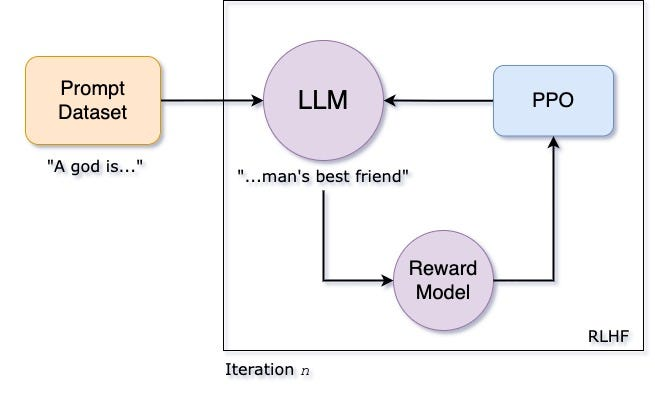

In [ ]:


# PPO specific utilities
class PPOMemory:
    def __init__(self):
        self.states = []
        self.actions = []
        self.logprobs = []
        self.rewards = []
        self.values = []
        self.dones = []

    def clear(self):
        self.states.clear()
        self.actions.clear()
        self.logprobs.clear()
        self.rewards.clear()
        self.values.clear()
        self.dones.clear()

    def to_tensor(self, device):
        return (
            torch.stack(self.states).to(device),
            torch.stack(self.actions).to(device),
            torch.stack(self.logprobs).to(device),
            torch.tensor(self.rewards, device=device),
            torch.stack(self.values).to(device),
            torch.tensor(self.dones, device=device)
        )

class RLHFTrainer:
    def __init__(
        self,
        model,
        reward_model,
        optimizer,
        device,
        clip_epsilon=0.2,
        value_coef=0.5,
        entropy_coef=0.01
    ):
        self.model = model
        self.reward_model = reward_model
        self.optimizer = optimizer
        self.device = device
        self.clip_epsilon = clip_epsilon
        self.value_coef = value_coef
        self.entropy_coef = entropy_coef
        self.memory = PPOMemory()

    def get_action(self, state):
        with torch.no_grad():
            logits, value = self.model(state, return_value=True)
            # Sample from the last token's prediction
            probs = F.softmax(logits[:, -1], dim=-1)
            dist = Categorical(probs)
            action = dist.sample()
            log_prob = dist.log_prob(action)
            return action, log_prob, value

    def evaluate_actions(self, states, actions):
        logits, values = self.model(states, return_value=True)
        probs = F.softmax(logits[:, -1], dim=-1)
        dist = Categorical(probs)
        log_probs = dist.log_prob(actions)
        entropy = dist.entropy()
        return log_probs, entropy, values

    def compute_gae(self, rewards, values, dones, gamma=0.99, lambda_=0.95):
        advantages = []
        gae = 0
        for t in reversed(range(len(rewards))):
            if t == len(rewards) - 1:
                next_value = 0
            else:
                next_value = values[t + 1]

            delta = rewards[t] + gamma * next_value * (1 - dones[t]) - values[t]
            gae = delta + gamma * lambda_ * (1 - dones[t]) * gae
            advantages.insert(0, gae)

        return torch.tensor(advantages, device=self.device)

    def update(self, epochs=10, batch_size=64):
        states, actions, old_log_probs, rewards, values, dones = self.memory.to_tensor(self.device)
        advantages = self.compute_gae(rewards, values, dones)
        returns = advantages + values
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)

        for _ in range(epochs):
            # Create batches
            indices = torch.randperm(len(states))
            for start in range(0, len(states), batch_size):
                end = start + batch_size
                batch_indices = indices[start:end]

                batch_states = states[batch_indices]
                batch_actions = actions[batch_indices]
                batch_old_log_probs = old_log_probs[batch_indices]
                batch_advantages = advantages[batch_indices]
                batch_returns = returns[batch_indices]

                # Get current policy outputs
                log_probs, entropy, current_values = self.evaluate_actions(
                    batch_states, batch_actions
                )

                # Calculate policy loss
                ratio = torch.exp(log_probs - batch_old_log_probs)
                surr1 = ratio * batch_advantages
                surr2 = torch.clamp(ratio, 1.0 - self.clip_epsilon, 1.0 + self.clip_epsilon) * batch_advantages
                policy_loss = -torch.min(surr1, surr2).mean()

                # Calculate value loss
                value_loss = F.mse_loss(current_values, batch_returns)

                # Calculate total loss
                loss = (
                    policy_loss
                    + self.value_coef * value_loss
                    - self.entropy_coef * entropy.mean()
                )

                # Optimize
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

        self.memory.clear()

# Modified training function to include RLHF
def train_with_rlhf(model, reward_model, trainer, data_loader, num_episodes=1000):
    for episode in range(num_episodes):
        state = next(iter(data_loader))['input_ids'].to(device)
        done = False
        episode_reward = 0

        while not done:
            # Get action from policy
            action, log_prob, value = trainer.get_action(state)

            # Create next state (append action to sequence)
            next_state = torch.cat([state, action.unsqueeze(1)], dim=1)

            # Get reward from reward model
            with torch.no_grad():
                reward = reward_model(next_state)

            # Store transition
            trainer.memory.states.append(state)
            trainer.memory.actions.append(action)
            trainer.memory.logprobs.append(log_prob)
            trainer.memory.rewards.append(reward.item())
            trainer.memory.values.append(value)
            trainer.memory.dones.append(done)

            state = next_state
            episode_reward += reward.item()

            # End episode if sequence is too long
            if state.size(1) >= 100:  # Max sequence length
                done = True

        # Update policy after each episode
        trainer.update()

        if episode % 10 == 0:
            print(f"Episode {episode}, Reward: {episode_reward:.2f}")



In [2]:
pip install torch torchvision torchtext


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.9 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical
from torch.utils.data import DataLoader, Dataset

# Custom dataset for RLHF training
class TextDataset(Dataset):
    def __init__(self, texts, max_length=100):
        self.texts = texts
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # For this example, we'll just use random tensors
        # In practice, you would tokenize self.texts[idx] here
        input_length = min(50, self.max_length)  # Random length between 1 and max_length
        return {
            'input_ids': torch.randint(0, 30522, (input_length,)),
            'attention_mask': torch.ones(input_length)
        }

def collate_fn(batch):
    # Get max length in batch
    max_length = max(len(item['input_ids']) for item in batch)

    # Pad all sequences to max length
    input_ids = []
    attention_masks = []

    for item in batch:
        padding_length = max_length - len(item['input_ids'])

        padded_input_ids = torch.cat([
            item['input_ids'],
            torch.zeros(padding_length, dtype=torch.long)
        ])

        padded_attention_mask = torch.cat([
            item['attention_mask'],
            torch.zeros(padding_length)
        ])

        input_ids.append(padded_input_ids)
        attention_masks.append(padded_attention_mask)

    return {
        'input_ids': torch.stack(input_ids),
        'attention_mask': torch.stack(attention_masks)
    }

def get_data_loader(batch_size=32):
    # Create dummy data for demonstration
    dummy_texts = ["Sample text " + str(i) for i in range(1000)]
    dataset = TextDataset(dummy_texts)
    return DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=True,
        collate_fn=collate_fn
    )

# Keep your existing model definitions (RLHFTransformer, RewardModel, etc.)...

class RLHFTrainer:
    def __init__(self, model, reward_model, optimizer, device, clip_epsilon=0.2, value_coef=0.5, entropy_coef=0.01):
        self.model = model
        self.reward_model = reward_model
        self.optimizer = optimizer
        self.device = device
        self.clip_epsilon = clip_epsilon
        self.value_coef = value_coef
        self.entropy_coef = entropy_coef
        self.memory = PPOMemory()

    def get_action(self, state):
        with torch.no_grad():
            logits, value = self.model(state, return_value=True)
            # Sample from the last token's prediction
            probs = F.softmax(logits[:, -1], dim=-1)
            dist = Categorical(probs)
            action = dist.sample()
            log_prob = dist.log_prob(action)
            return action, log_prob, value

# Modified training function with proper batch handling
def train_with_rlhf(model, reward_model, trainer, data_loader, num_episodes=1000):
    device = next(model.parameters()).device

    for episode in range(num_episodes):
        total_reward = 0

        for batch in data_loader:
            # Move batch to device
            state = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            # Generate sequence
            for _ in range(20):  # Generate up to 20 new tokens
                action, log_prob, value = trainer.get_action(state)

                # Append action to state
                next_state = torch.cat([state, action.unsqueeze(1)], dim=1)

                # Get reward
                with torch.no_grad():
                    reward = reward_model(next_state)

                # Store transition
                trainer.memory.states.append(state)
                trainer.memory.actions.append(action)
                trainer.memory.logprobs.append(log_prob)
                trainer.memory.rewards.append(reward.mean().item())
                trainer.memory.values.append(value)
                trainer.memory.dones.append(False)

                state = next_state
                total_reward += reward.mean().item()

            # Mark last transition as done
            trainer.memory.dones[-1] = True

            # Update policy if enough steps collected
            if len(trainer.memory.states) >= 512:  # Batch size for updates
                trainer.update()

        if episode % 10 == 0:
            print(f"Episode {episode}, Average Reward: {total_reward / len(data_loader):.2f}")

def main():
    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Initialize models
    model = RLHFTransformer(
        src_vocab_size=30522,
        tgt_vocab_size=30522,
        d_model=512,
        num_heads=8,
        num_layers=6
    ).to(device)

    reward_model = RewardModel(hidden_size=512).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    # Initialize trainer
    trainer = RLHFTrainer(
        model=model,
        reward_model=reward_model,
        optimizer=optimizer,
        device=device
    )

    # Get data loader
    data_loader = get_data_loader(batch_size=32)

    # Train with RLHF
    train_with_rlhf(model, reward_model, trainer, data_loader)

if __name__ == "__main__":
    main()

AttributeError: 'RLHFTrainer' object has no attribute 'update'

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions import Categorical
from torch.utils.data import DataLoader, Dataset

# [Previous Dataset and collate_fn remain the same]

class PPOMemory:
    def __init__(self):
        self.states = []
        self.actions = []
        self.logprobs = []
        self.rewards = []
        self.values = []
        self.dones = []
        self.attention_masks = []

    def clear(self):
        del self.states[:]
        del self.actions[:]
        del self.logprobs[:]
        del self.rewards[:]
        del self.values[:]
        del self.dones[:]
        del self.attention_masks[:]

def train_with_rlhf(model, reward_model, trainer, data_loader, num_episodes=1000, max_seq_length=100):
    device = next(model.parameters()).device
    model.train()

    for episode in range(num_episodes):
        total_reward = 0

        for batch in data_loader:
            state = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            batch_size = state.size(0)

            # Initialize sequence buffers for this batch
            current_states = state.clone()
            current_attention_masks = attention_mask.clone()

            for step in range(20):
                # Truncate sequences if they exceed max_seq_length
                if current_states.size(1) > max_seq_length:
                    current_states = current_states[:, -max_seq_length:]
                    current_attention_masks = current_attention_masks[:, -max_seq_length:]

                action, log_prob, value = trainer.get_action(current_states, current_attention_masks)

                # Store current state before updating
                for i in range(batch_size):
                    trainer.memory.states.append(current_states[i].clone())
                    trainer.memory.attention_masks.append(current_attention_masks[i].clone())
                    trainer.memory.actions.append(action[i])
                    trainer.memory.logprobs.append(log_prob[i])
                    trainer.memory.values.append(value[i])
                    trainer.memory.dones.append(False)

                # Create next state by appending action
                next_states = torch.cat([current_states, action.unsqueeze(1)], dim=1)
                next_attention_masks = torch.cat([
                    current_attention_masks,
                    torch.ones(batch_size, 1, device=device)
                ], dim=1)

                with torch.no_grad():
                    # Get embeddings using model's embedding layer
                    embedded_state = model.embedding(next_states)
                    state_representation = embedded_state.mean(dim=1)
                    rewards = reward_model(state_representation)

                    # Store rewards
                    for i in range(batch_size):
                        trainer.memory.rewards.append(rewards[i].item())

                    mean_reward = rewards.mean().item()

                current_states = next_states
                current_attention_masks = next_attention_masks
                total_reward += mean_reward

            # Mark the last step of each sequence as done
            if len(trainer.memory.dones) >= batch_size:
                for i in range(batch_size):
                    trainer.memory.dones[-i-1] = True

            # Update if we have enough samples
            if len(trainer.memory.states) >= 512:
                # Pad all sequences to the same length before stacking
                max_len = max(state.size(1) for state in trainer.memory.states)
                padded_states = []
                padded_attention_masks = []

                for state, mask in zip(trainer.memory.states, trainer.memory.attention_masks):
                    pad_len = max_len - state.size(0)
                    if pad_len > 0:
                        padded_state = F.pad(state, (0, pad_len), value=0)
                        padded_mask = F.pad(mask, (0, pad_len), value=0)
                    else:
                        padded_state = state
                        padded_mask = mask
                    padded_states.append(padded_state)
                    padded_attention_masks.append(padded_mask)

                # Update memory with padded sequences
                trainer.memory.states = padded_states
                trainer.memory.attention_masks = padded_attention_masks

                # Perform update
                trainer.update()

        if episode % 10 == 0:
            print(f"Episode {episode}, Average Reward: {total_reward / len(data_loader):.2f}")

class RLHFTrainer:
    def __init__(self, model, reward_model, optimizer, device, clip_epsilon=0.2, value_coef=0.5, entropy_coef=0.01):
        self.model = model
        self.reward_model = reward_model
        self.optimizer = optimizer
        self.device = device
        self.clip_epsilon = clip_epsilon
        self.value_coef = value_coef
        self.entropy_coef = entropy_coef
        self.memory = PPOMemory()

    def get_action(self, state, attention_mask):
        # Forward pass to get logits and value predictions
        logits, value = self.model(state, attention_mask, return_value=True)
        dist = Categorical(logits=logits[:, -1])  # Take the last token's logits
        action = dist.sample()
        log_prob = dist.log_prob(action)

        return action, log_prob, value

    # Rest of your methods, including the `update` method


    def update(self):
        # Stack padded sequences
        states = torch.stack(self.memory.states).to(self.device)
        actions = torch.stack(self.memory.actions).to(self.device)
        log_probs = torch.stack(self.memory.logprobs).to(self.device)
        rewards = torch.tensor(self.memory.rewards, dtype=torch.float).to(self.device)
        values = torch.stack(self.memory.values).to(self.device)
        dones = torch.tensor(self.memory.dones, dtype=torch.float).to(self.device)
        attention_masks = torch.stack(self.memory.attention_masks).to(self.device)

        returns, advantages = self.calculate_advantages(rewards, values, dones)

        for _ in range(4):
            logits, new_values = self.model(states, attention_masks, return_value=True)
            dist = Categorical(logits=logits[:, -1])
            new_log_probs = dist.log_prob(actions)

            ratios = torch.exp(new_log_probs - log_probs.detach())
            surr1 = ratios * advantages
            surr2 = torch.clamp(ratios, 1 - self.clip_epsilon, 1 + self.clip_epsilon) * advantages

            policy_loss = -torch.min(surr1, surr2).mean()
            value_loss = F.mse_loss(new_values, returns)
            entropy = dist.entropy().mean()

            loss = policy_loss + self.value_coef * value_loss - self.entropy_coef * entropy

            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

        self.memory.clear()

    # [Rest of the implementation remains the same]



In [ ]:
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = RLHFTransformer(
        src_vocab_size=30522,
        tgt_vocab_size=30522,
        d_model=512,
        num_heads=8,
        num_layers=6
    ).to(device)

    reward_model = RewardModel(hidden_size=512).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    trainer = RLHFTrainer(
        model=model,
        reward_model=reward_model,
        optimizer=optimizer,
        device=device
    )
    data_loader = get_data_loader(batch_size=32)

    train_with_rlhf(model, reward_model, trainer, data_loader)

if __name__ == "__main__":
    main()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


TypeError: RLHFTransformer.forward() got multiple values for argument 'return_value'

In [6]:
import torch
import torch.nn as nn
import time
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
from torch.distributions import Categorical

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example Dataset
class SimpleDataset(Dataset):
    def __init__(self, num_samples=1000, seq_length=50, vocab_size=30522):
        self.num_samples = num_samples
        self.seq_length = seq_length
        self.vocab_size = vocab_size
        self.data = [
            {
                'input_ids': torch.randint(0, vocab_size, (seq_length,)),
                'labels': torch.randint(0, vocab_size, (seq_length,))
            }
            for _ in range(num_samples)
        ]

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        return self.data[idx]

# DataLoader
def get_data_loader(batch_size=32):
    dataset = SimpleDataset()
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Base Transformer Model - Define this BEFORE RLHFTransformer
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers):
        super(Transformer, self).__init__()
        self.embedding = nn.Embedding(src_vocab_size, d_model)
        encoder_layer = nn.TransformerEncoderLayer(d_model, num_heads)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers)
        self.fc_out = nn.Linear(d_model, tgt_vocab_size)

    def forward(self, src):
        embedded = self.embedding(src)  # (batch_size, seq_length, d_model)
        embedded = embedded.permute(1, 0, 2)  # (seq_length, batch_size, d_model)
        transformer_out = self.transformer_encoder(embedded)  # (seq_length, batch_size, d_model)
        output = self.fc_out(transformer_out)  # (seq_length, batch_size, tgt_vocab_size)
        return output.permute(1, 0, 2)  # (batch_size, seq_length, tgt_vocab_size)

# Reward Model
class RewardModel(nn.Module):
    def __init__(self, hidden_size):
        super(RewardModel, self).__init__()
        self.embedding = nn.Embedding(30522, hidden_size)
        self.transformer_layer = nn.TransformerEncoderLayer(hidden_size, 8)
        self.transformer = nn.TransformerEncoder(self.transformer_layer, 2)
        self.value_head = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )

    def forward(self, x):
        embedded = self.embedding(x)
        embedded = embedded.permute(1, 0, 2)
        transformed = self.transformer(embedded)
        pooled = transformed.mean(dim=0)
        value = self.value_head(pooled)
        return value

# Now define RLHFTransformer after the base Transformer
class RLHFTransformer(Transformer):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers):
        super(RLHFTransformer, self).__init__(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers)
        self.value_head = nn.Sequential(
            nn.Linear(d_model, d_model),
            nn.ReLU(),
            nn.Linear(d_model, 1)
        )

    def forward(self, src):
        embedded = self.embedding(src)
        embedded = embedded.permute(1, 0, 2)
        transformer_out = self.transformer_encoder(embedded)
        logits = self.fc_out(transformer_out)
        values = self.value_head(transformer_out.mean(dim=0))
        return logits.permute(1, 0, 2), values

# PPO-specific utilities
def compute_gae(rewards, values, gamma=0.99, lam=0.95):
    advantages = []
    last_advantage = 0
    last_value = values[-1]

    for r, v in zip(reversed(rewards), reversed(values[:-1])):
        td_error = r + gamma * last_value - v
        advantage = td_error + gamma * lam * last_advantage
        advantages.insert(0, advantage)
        last_advantage = advantage
        last_value = v

    return torch.tensor(advantages)

# Utility function to count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Evaluation function
def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in data_loader:
            inputs = batch['input_ids'].to(device)
            targets = batch['labels'].to(device)

            # Handle both regular and RLHF transformer outputs
            if isinstance(model, RLHFTransformer):
                outputs, _ = model(inputs)
            else:
                outputs = model(inputs)

            loss = criterion(outputs.reshape(-1, outputs.size(-1)), targets.reshape(-1))
            total_loss += loss.item()

    return total_loss / len(data_loader)

# RLHF training function
def train_with_rlhf(model, reward_model, dataloader, num_epochs=1, ppo_epochs=2,
                    epsilon=0.2, value_coef=0.5, entropy_coef=0.01):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
    model.train()
    reward_model.eval()

    for epoch in range(num_epochs):
        for batch in dataloader:
            inputs = batch['input_ids'].to(device)

            # Get initial policy distribution and values
            with torch.no_grad():
                old_logits, old_values = model(inputs)
                old_probs = torch.softmax(old_logits, dim=-1)
                old_dist = Categorical(old_probs)
                old_actions = old_dist.sample()
                old_log_probs = old_dist.log_prob(old_actions)

            # Compute rewards using reward model
            with torch.no_grad():
                rewards = reward_model(old_actions)
                advantages = compute_gae(rewards, old_values.squeeze(-1))
                print("Advantages shape:", advantages.shape)
                print("Old values shape:", old_values.shape)
                if advantages.size(0) < old_values.size(0):
                 padding_size = old_values.size(0) - advantages.size(0)
                 advantages = F.pad(advantages, (0, padding_size), value=0)
                elif advantages.size(0) > old_values.size(0):
                  advantages = advantages.unsqueeze(1).expand_as(ratio)

                returns = advantages + old_values.squeeze(-1)

            # PPO optimization steps
            for _ in range(ppo_epochs):
                # Get new policy distribution and values
                new_logits, new_values = model(inputs)
                new_probs = torch.softmax(new_logits, dim=-1)
                new_dist = Categorical(new_probs)
                new_log_probs = new_dist.log_prob(old_actions)

                # Compute policy ratio and PPO clipped objective
                ratio = torch.exp(new_log_probs - old_log_probs.detach())
                ratio = ratio.mean(dim=1)
                print("Ratio shape:", ratio.shape)
                print("Advantages shape:", advantages.shape)

                surr1 = ratio * advantages.detach()
                surr2 = torch.clamp(ratio, 1 - epsilon, 1 + epsilon) * advantages.detach()
                policy_loss = -torch.min(surr1, surr2).mean()

                # Compute value loss
                value_loss = 0.5 * (returns.detach() - new_values.squeeze(-1)).pow(2).mean()

                # Compute entropy bonus
                entropy = new_dist.entropy().mean()

                # Total loss
                loss = policy_loss + value_coef * value_loss - entropy_coef * entropy

                # Optimization step
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

def train_and_evaluate_with_rlhf(hidden_size, num_layers, num_heads, vocab_size, num_experts=4, epochs=1):
    data_loader = get_data_loader(batch_size=32)

    # Initialize models
    rlhf_transformer = RLHFTransformer(
        src_vocab_size=vocab_size,
        tgt_vocab_size=vocab_size,
        d_model=hidden_size,
        num_heads=num_heads,
        num_layers=num_layers
    ).to(device)

    reward_model = RewardModel(hidden_size).to(device)

    # Train with RLHF
    print("Training with RLHF...")
    train_with_rlhf(rlhf_transformer, reward_model, data_loader, num_epochs=epochs)

    # Evaluate
    criterion = nn.CrossEntropyLoss()
    eval_loss = evaluate_model(rlhf_transformer, data_loader, criterion, device)

    results = {
        "RLHF Transformer": {
            "hidden_size": hidden_size,
            "num_layers": num_layers,
            "num_heads": num_heads,
            "eval_loss": eval_loss,
            "param_count": count_parameters(rlhf_transformer)
        }
    }

    return results

if __name__ == "__main__":
    # Define hyperparameter ranges
    hidden_sizes = [256, 512]
    num_layers = [2, 4]
    num_heads = [8, 16]
    vocab_size = 30522

    # Run the RLHF training
    """
    all_results = []
    for h, l, nh in [(h, l, nh) for h in hidden_sizes for l in num_layers for nh in num_heads]:
        print(f"\nRunning RLHF with: hidden_size={h}, num_layers={l}, num_heads={nh}")
        results = train_and_evaluate_with_rlhf(h, l, nh, vocab_size)
        all_results.append(results)"""
    all_results = []
    selected_combinations = [
    (512, 4, 8),  # Example: moderate hidden size, fewer layers, standard heads
    (256, 2, 4),  # Lower setting for faster testing
    (768, 6, 12),  # Higher setting to compare performance gains
     ]

    for h, l, nh in selected_combinations:
     print(f"\nRunning RLHF with: hidden_size={h}, num_layers={l}, num_heads={nh}")
     results = train_and_evaluate_with_rlhf(h, l, nh, vocab_size)
     all_results.append(results)


    # Print results
    print("\nAll RLHF Results:")
    for res in all_results:
        print(res)


Running RLHF with: hidden_size=512, num_layers=4, num_heads=8
Training with RLHF...
Advantages shape: torch.Size([31])
Old values shape: torch.Size([32, 1])
Ratio shape: torch.Size([32])
Advantages shape: torch.Size([32])
Ratio shape: torch.Size([32])
Advantages shape: torch.Size([32])
Advantages shape: torch.Size([31])
Old values shape: torch.Size([32, 1])
Ratio shape: torch.Size([32])
Advantages shape: torch.Size([32])
Ratio shape: torch.Size([32])
Advantages shape: torch.Size([32])
Advantages shape: torch.Size([31])
Old values shape: torch.Size([32, 1])
Ratio shape: torch.Size([32])
Advantages shape: torch.Size([32])
Ratio shape: torch.Size([32])
Advantages shape: torch.Size([32])
Advantages shape: torch.Size([31])
Old values shape: torch.Size([32, 1])
Ratio shape: torch.Size([32])
Advantages shape: torch.Size([32])
Ratio shape: torch.Size([32])
Advantages shape: torch.Size([32])
Advantages shape: torch.Size([31])
Old values shape: torch.Size([32, 1])
Ratio shape: torch.Size([32])


In [7]:
all_results

[{'RLHF Transformer': {'hidden_size': 512,
   'num_layers': 4,
   'num_heads': 8,
   'eval_loss': 10.493941456079483,
   'param_count': 44157755}},
 {'RLHF Transformer': {'hidden_size': 256,
   'num_layers': 2,
   'num_heads': 4,
   'eval_loss': 10.49897426366806,
   'param_count': 18353979}},
 {'RLHF Transformer': {'hidden_size': 768,
   'num_layers': 6,
   'num_heads': 12,
   'eval_loss': 10.506198555231094,
   'param_count': 80587579}}]

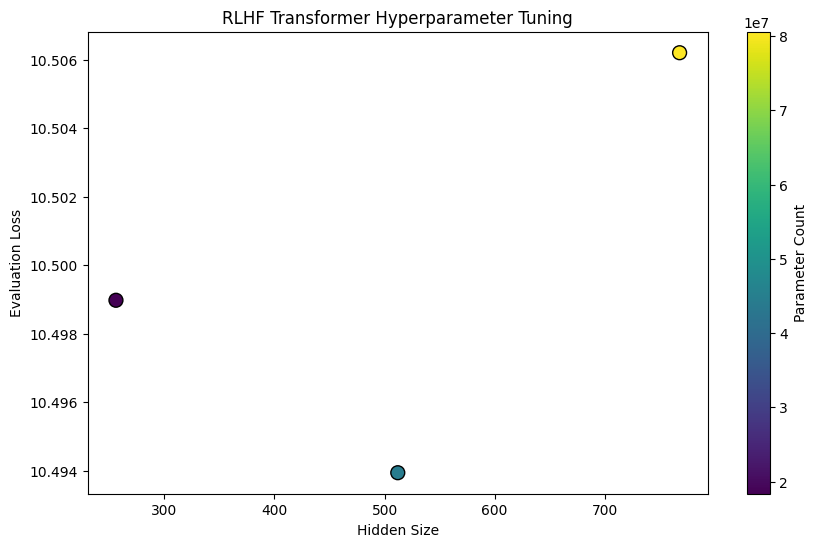

In [8]:
import matplotlib.pyplot as plt

# Data for the plot
hidden_sizes = [512, 256, 768]
eval_losses = [10.493941456079483, 10.49897426366806, 10.506198555231094]
param_counts = [44157755, 18353979, 80587579]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for Eval Loss vs Hidden Size
scatter = ax.scatter(hidden_sizes, eval_losses, c=param_counts, cmap='viridis', s=100, edgecolors='k')

# Add labels and title
ax.set_xlabel('Hidden Size')
ax.set_ylabel('Evaluation Loss')
ax.set_title('RLHF Transformer Hyperparameter Tuning')

# Add colorbar for the parameter counts
cbar = fig.colorbar(scatter)
cbar.set_label('Parameter Count')

plt.show()


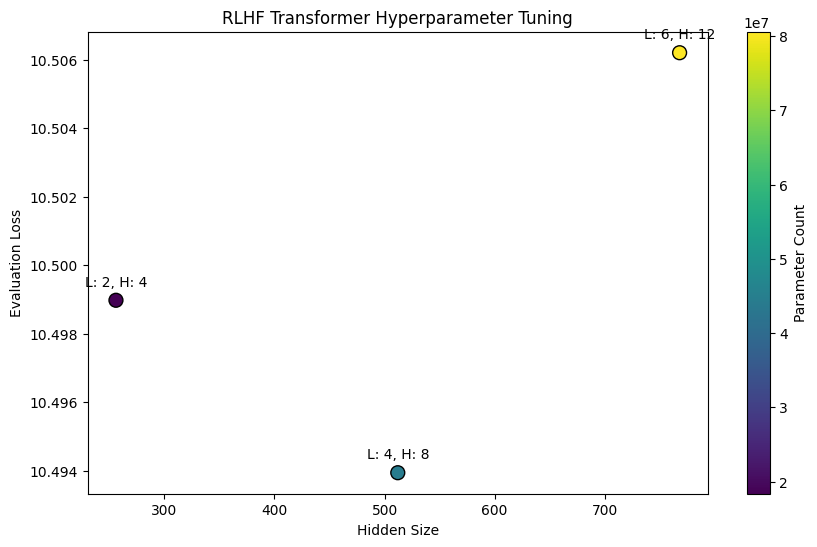

In [9]:
import matplotlib.pyplot as plt

# Data for the plot
hidden_sizes = [512, 256, 768]
num_layers = [4, 2, 6]
num_heads = [8, 4, 12]
eval_losses = [10.493941456079483, 10.49897426366806, 10.506198555231094]
param_counts = [44157755, 18353979, 80587579]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot for Eval Loss vs Hidden Size
scatter = ax.scatter(hidden_sizes, eval_losses, c=param_counts, cmap='viridis', s=100, edgecolors='k')

# Add labels and title
ax.set_xlabel('Hidden Size')
ax.set_ylabel('Evaluation Loss')
ax.set_title('RLHF Transformer Hyperparameter Tuning')

# Annotate points with num_layers and num_heads
for i in range(len(hidden_sizes)):
    ax.annotate(f"L: {num_layers[i]}, H: {num_heads[i]}",
                (hidden_sizes[i], eval_losses[i]),
                textcoords="offset points", xytext=(0,10), ha='center')

# Add colorbar for the parameter counts
cbar = fig.colorbar(scatter)
cbar.set_label('Parameter Count')

plt.show()


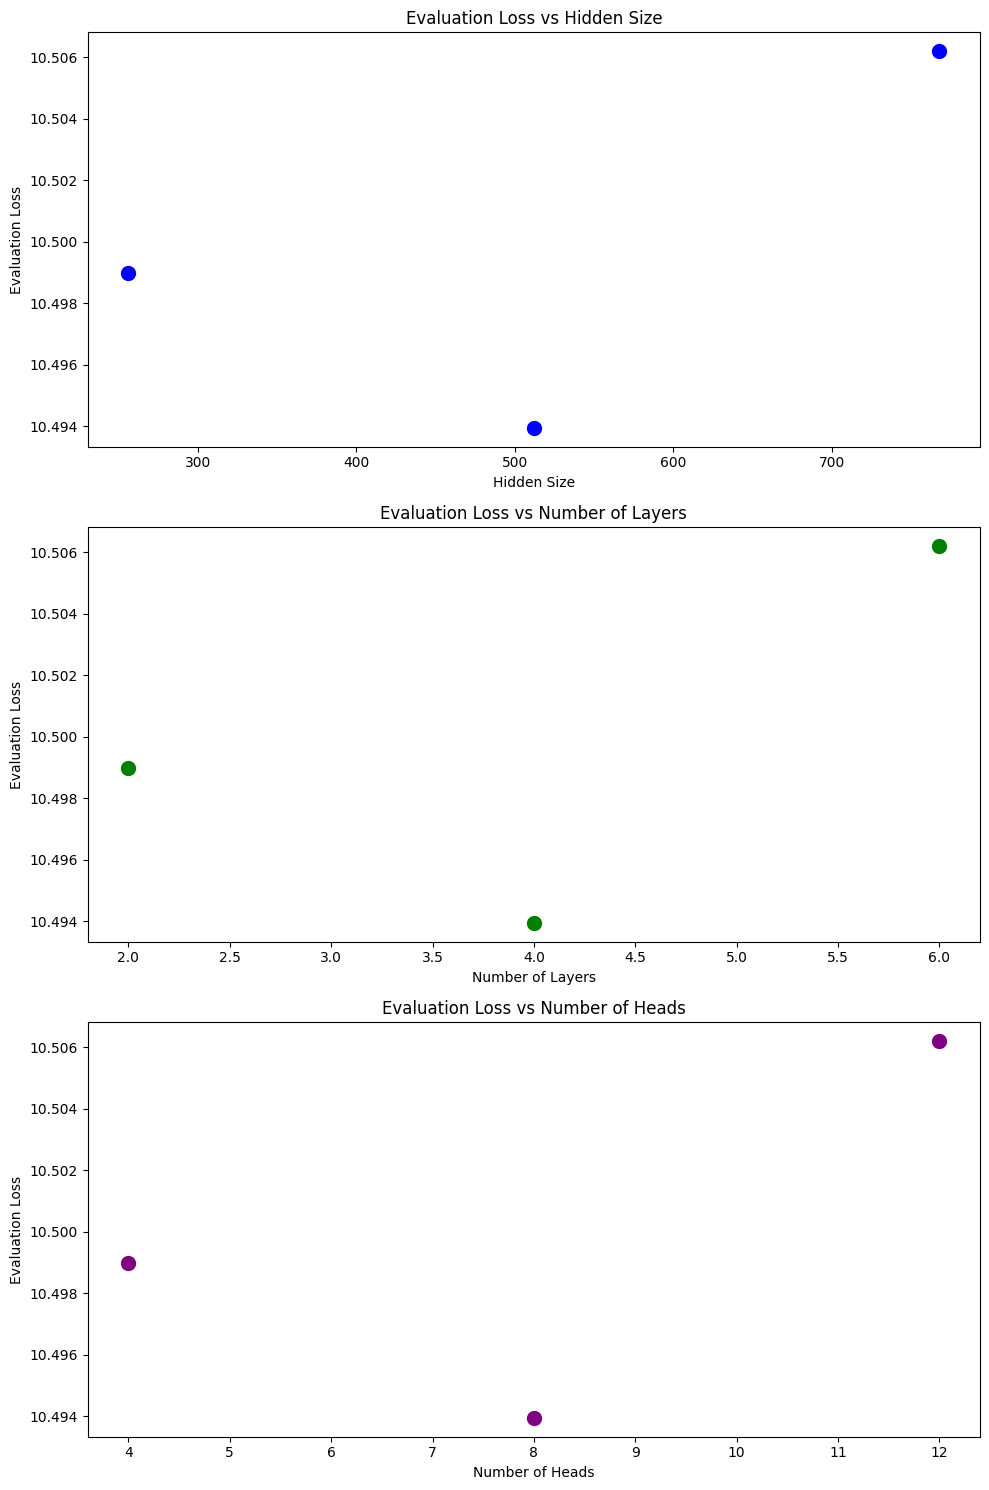

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
hidden_sizes = [512, 256, 768]
num_layers = [4, 2, 6]
num_heads = [8, 4, 12]
eval_losses = [10.493941456079483, 10.49897426366806, 10.506198555231094]
param_counts = [44157755, 18353979, 80587579]

# Set up the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot Evaluation Loss vs. Hidden Size
axs[0].scatter(hidden_sizes, eval_losses, color='blue', s=100, label='Eval Loss')
axs[0].set_xlabel('Hidden Size')
axs[0].set_ylabel('Evaluation Loss')
axs[0].set_title('Evaluation Loss vs Hidden Size')

# Plot Evaluation Loss vs. Number of Layers
axs[1].scatter(num_layers, eval_losses, color='green', s=100, label='Eval Loss')
axs[1].set_xlabel('Number of Layers')
axs[1].set_ylabel('Evaluation Loss')
axs[1].set_title('Evaluation Loss vs Number of Layers')

# Plot Evaluation Loss vs. Number of Heads
axs[2].scatter(num_heads, eval_losses, color='purple', s=100, label='Eval Loss')
axs[2].set_xlabel('Number of Heads')
axs[2].set_ylabel('Evaluation Loss')
axs[2].set_title('Evaluation Loss vs Number of Heads')

# Adjust layout
plt.tight_layout()
plt.show()


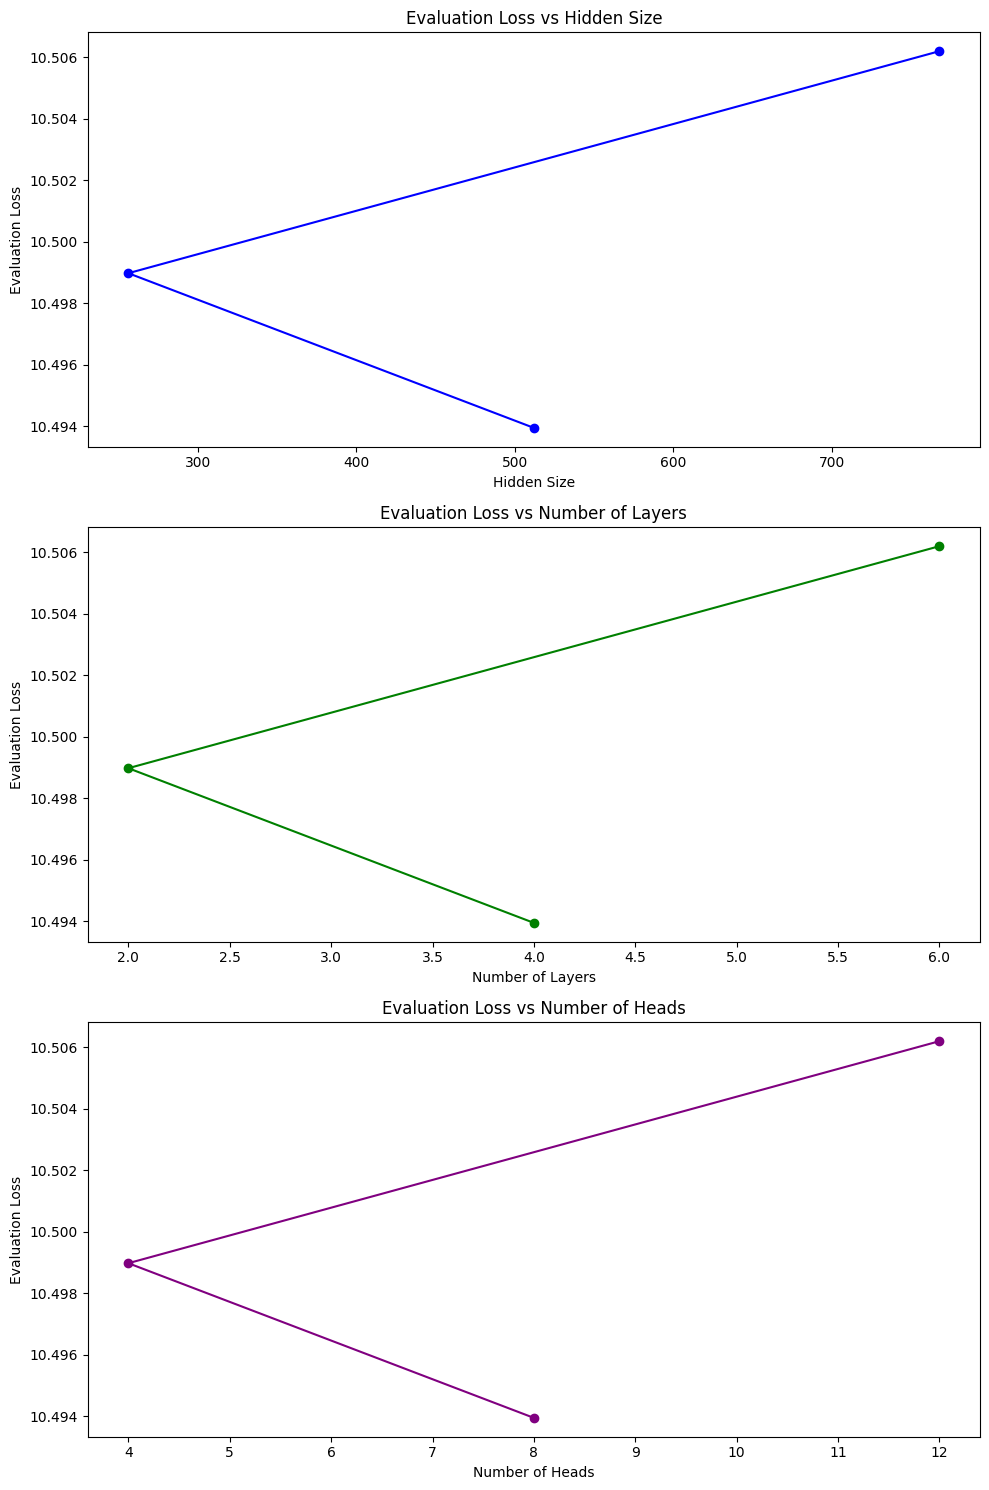

In [11]:
import matplotlib.pyplot as plt

# Data for plotting
hidden_sizes = [512, 256, 768]
num_layers = [4, 2, 6]
num_heads = [8, 4, 12]
eval_losses = [10.493941456079483, 10.49897426366806, 10.506198555231094]

# Set up the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plot Evaluation Loss vs. Hidden Size
axs[0].plot(hidden_sizes, eval_losses, marker='o', color='blue', linestyle='-', label='Eval Loss')
axs[0].set_xlabel('Hidden Size')
axs[0].set_ylabel('Evaluation Loss')
axs[0].set_title('Evaluation Loss vs Hidden Size')

# Plot Evaluation Loss vs. Number of Layers
axs[1].plot(num_layers, eval_losses, marker='o', color='green', linestyle='-', label='Eval Loss')
axs[1].set_xlabel('Number of Layers')
axs[1].set_ylabel('Evaluation Loss')
axs[1].set_title('Evaluation Loss vs Number of Layers')

# Plot Evaluation Loss vs. Number of Heads
axs[2].plot(num_heads, eval_losses, marker='o', color='purple', linestyle='-', label='Eval Loss')
axs[2].set_xlabel('Number of Heads')
axs[2].set_ylabel('Evaluation Loss')
axs[2].set_title('Evaluation Loss vs Number of Heads')

# Adjust layout
plt.tight_layout()
plt.show()


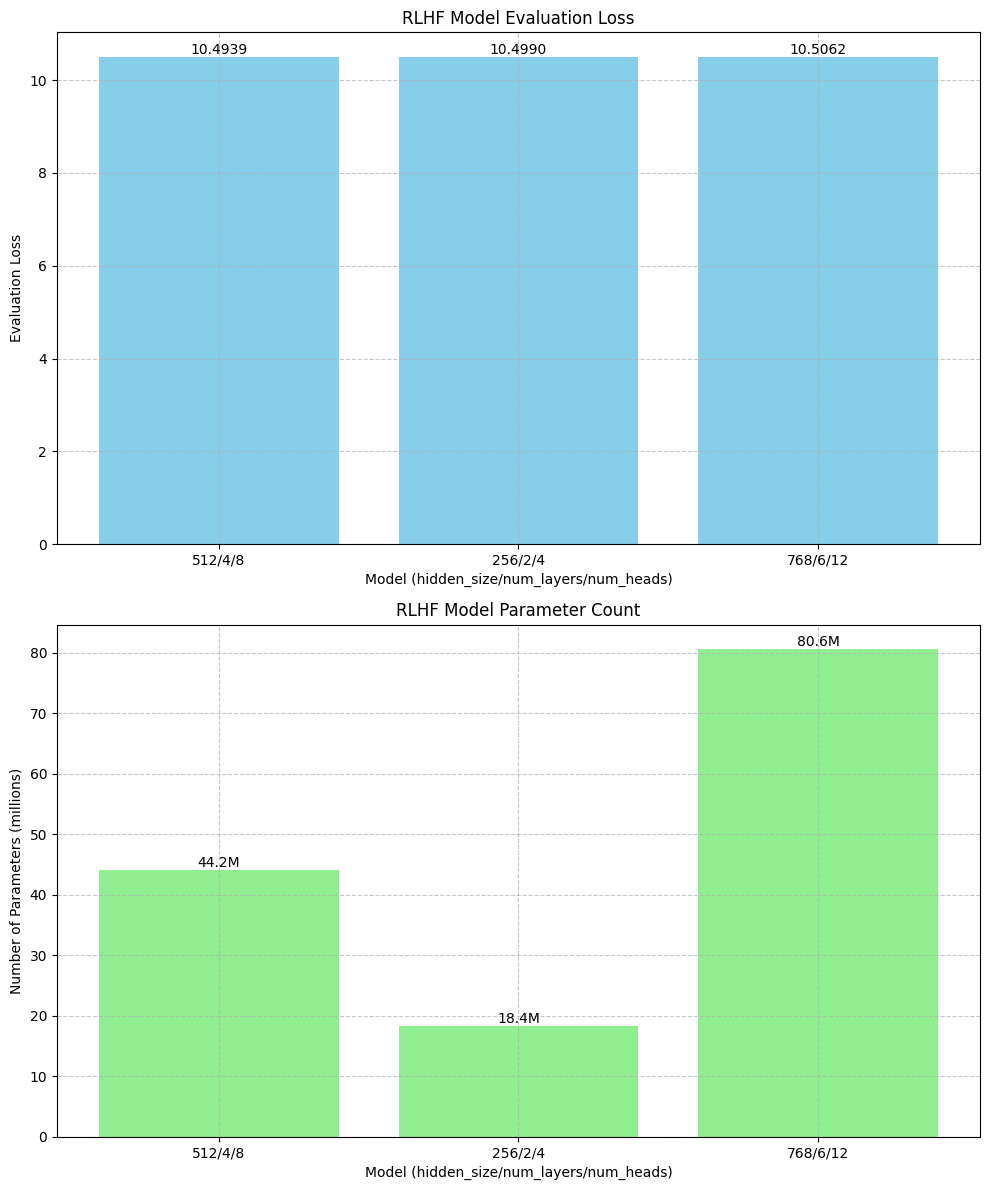

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = [
    {
        'hidden_size': 512,
        'num_layers': 4,
        'num_heads': 8,
        'eval_loss': 10.493941456079483,
        'param_count': 44157755
    },
    {
        'hidden_size': 256,
        'num_layers': 2,
        'num_heads': 4,
        'eval_loss': 10.49897426366806,
        'param_count': 18353979
    },
    {
        'hidden_size': 768,
        'num_layers': 6,
        'num_heads': 12,
        'eval_loss': 10.506198555231094,
        'param_count': 80587579
    }
]

# Create lists for plotting
model_names = [f"{m['hidden_size']}/{m['num_layers']}/{m['num_heads']}" for m in models]
eval_losses = [m['eval_loss'] for m in models]
param_counts = [m['param_count'] / 1_000_000 for m in models]  # Convert to millions

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Evaluation Loss
bars1 = ax1.bar(model_names, eval_losses, color='skyblue')
ax1.set_title('RLHF Model Evaluation Loss')
ax1.set_xlabel('Model (hidden_size/num_layers/num_heads)')
ax1.set_ylabel('Evaluation Loss')
ax1.grid(True, linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Plot 2: Parameter Count
bars2 = ax2.bar(model_names, param_counts, color='lightgreen')
ax2.set_title('RLHF Model Parameter Count')
ax2.set_xlabel('Model (hidden_size/num_layers/num_heads)')
ax2.set_ylabel('Number of Parameters (millions)')
ax2.grid(True, linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}M',
             ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()